In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]

print(X.shape)

(150, 4)


In [8]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
 dense_12 (Dense)            (None, 3)                

In [9]:
# compile
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy')

# training
batch_size = 32
epochs = 200
history = model.fit(X, y, batch_size, epochs)

Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 220.8820
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 47.4322
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 25.7840
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 18.5986
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 14.3650
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 12.0125
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 10.1738
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 8.8265
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 7.8183
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 7.0281
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 6.3776
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 5.8493
Epoch 13/200
5/5 [==============================] - 0

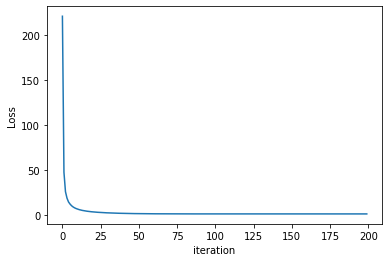

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [7]:
preds = model(X)
preds = preds.numpy()
print(preds.shape)

(150, 3)


In [8]:
predicted_class = np.argmax(preds, axis=1)
print(predicted_class.shape)

(150,)


In [9]:
print(predicted_class.shape)
print(y.shape)

(150,)
(150, 1)


In [10]:
y = y.reshape((150,))

In [11]:
print(predicted_class.shape)
print(y.shape)

(150,)
(150,)


In [12]:
acc = np.mean(predicted_class == y)
print(acc.mean())

0.9733333333333334


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# Data Preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]

# create model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=3, 
                           activation='softmax', 
                           input_shape=[4])])

# declare optimization method and loss function
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy')

# training
batch_size = 40
epochs = 500
records = model.fit(X, y, batch_size, epochs)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(records.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds = model(X)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

In [ ]:
# load model
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

model = tf.keras.models.load_model('model.h5')
preds = model(X)
#preds = model.predict(X)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

In [ ]:
# pre-processing data

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn import preprocessing

tf.keras.backend.set_floatx('float64')


batch_size = 40
epochs = 500

# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
X = preprocessing.scale(X)

# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

# declare optimization method and loss function
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# training
history = model.fit(X, y, batch_size, epochs)

model.save('model.h5')

In [ ]:
# load model
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn import preprocessing
tf.keras.backend.set_floatx('float64')

# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]



model = tf.keras.models.load_model('model.h5')
preds = model(X)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y[:,0])
print(acc.mean())

In [ ]:
#X = preprocessing.scale(X)

In [ ]:
import tensorflow as tf

y = [0, 1, 2, 2, 1, 0, 1]
classes = 3
tf.one_hot(y, classes)

In [ ]:
# one-hot encoding

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.keras.backend.set_floatx('float64')


# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4]
y = y.astype('uint8')

print(y)

classes = 3
onehots = tf.one_hot(y, classes)
print(onehots[:5])

In [ ]:
# one-hot encoding

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
tf.keras.backend.set_floatx('float64')


batch_size = 40
epochs = 500

# Data Preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4]
y = y.astype('uint8')

classes = 3
onehots = tf.one_hot(y, classes)

# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

# declare optimization method and loss function
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# training
history = model.fit(X, onehots, batch_size, epochs)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds = model(X)

preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

print(predicted_class.shape)
print(y.shape)

acc = np.mean(predicted_class == y)
print(acc.mean())